In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

X, y = prepare_data('advertising.csv')


In [29]:
# Question 1
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [30]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    # return w1, w2, w3, b
    return 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0

In [31]:
# Question 2
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1*w1 + x2*w2 +x3*w3 + b
    return result
y_pred = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_pred)

1.0


In [32]:
# Question 3
def compute_loss_mse(y, y_hat):
    loss = (y_hat - y)**2
    return loss
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [33]:
# Question 4 + 5
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi
def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)

print(g_wi, g_b)

-1.0 -3.0


In [34]:
# Question 6 + 7
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)

print(after_wi, after_b)

1.000005 0.50001


In [35]:
# One sample linear regression
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss_mse(y, y_hat)
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x1, y, y_hat)
            dl_dw3 = compute_gradient_wi(x1, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # update parameter
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w1, dl_dw2, lr)
            w3 = update_weight_wi(w1, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            
            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

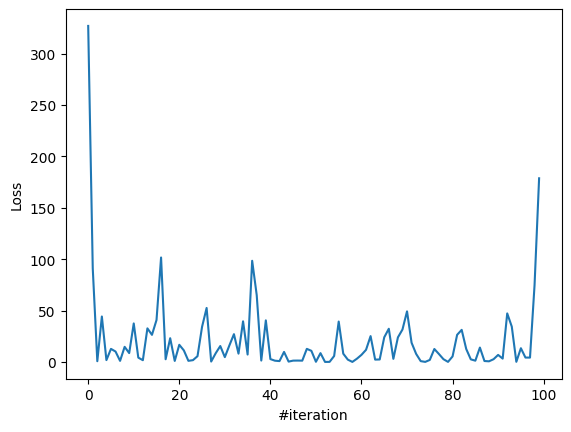

In [36]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [37]:
# Question 8
print(w1, w2, w3)

0.07881299060065254 0.10529822162053179 0.10529822162053179
